<a href="https://colab.research.google.com/github/NathaliaOliveir/CEE2/blob/main/Trabalho1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho 1: Análise da Taxa SELIC com Python

**Curso**: Estatística UnB    
**Disciplina**: Computação Estatística 2 em Python    
**Aluna**: Nathalia Oliveira Moreira    
**Matrícula**: 200042289    
**Professora**: José Augusto Fiorucci     
**Data de Entrega**: 22 de junho de 2025

---

## Tema do Trabalho

Este relatório tem como objetivo utilizar a linguagem Python para acessar dados reais da Taxa SELIC através da API do Banco Central do Brasil, realizando análises e visualizações que ajudem a compreender o comportamento da economia brasileira ao longo do tempo.

---

## Introdução

A **Taxa SELIC** (Sistema Especial de Liquidação e Custódia) é a taxa básica de juros da economia brasileira, utilizada como principal instrumento de política monetária pelo Banco Central do Brasil. Essa taxa influencia diretamente as demais taxas de juros praticadas no mercado, como as cobradas em empréstimos, financiamentos e aplicações financeiras.

Em termos práticos, quando o Banco Central aumenta a SELIC, o objetivo principal é conter a inflação; por outro lado, quando a taxa é reduzida, busca-se estimular a economia, incentivando o consumo e o investimento.

Monitorar a evolução da SELIC ao longo do tempo é fundamental para entender o comportamento da economia brasileira, seus ciclos de crescimento e retração, e os impactos sobre a vida da população.

Neste relatório, utilizaremos a linguagem Python para acessar dados reais da Taxa SELIC disponibilizados pela API do Banco Central, realizar análises estatísticas e gerar visualizações gráficas.


In [6]:
!pip install mplcyberpunk
!pip install python.bcb
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install seaborn

In [57]:
import matplotlib as mpl
import mplcyberpunk
from bcb import currency
from bcb import sgs
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from datetime import datetime
from datetime import timedelta
import pandas as pd

plt.style.use("default")

In [43]:
data_inicial = '2019-01-01'
selic = sgs.get({'selic': 432}, start=data_inicial)

In [49]:
selic['SELIC Anual (%)'] = selic['selic']
selic['SELIC Diaria (%)'] = (1 + selic['SELIC Anual (%)'] / 100) ** (1 / 252) - 1
selic['SELIC Acumulada (%)'] = (1 + selic['SELIC Diaria (%)']).cumprod() - 1

print(selic.head())

            selic  SELIC Anual (%)  selic Diaria (%)  SELIC Acumulada (%)  \
Date                                                                        
2019-01-01    6.5              6.5           0.00025              0.00025   
2019-01-02    6.5              6.5           0.00025              0.00050   
2019-01-03    6.5              6.5           0.00025              0.00075   
2019-01-04    6.5              6.5           0.00025              0.00100   
2019-01-05    6.5              6.5           0.00025              0.00125   

            SELIC Diaria (%)  
Date                          
2019-01-01           0.00025  
2019-01-02           0.00025  
2019-01-03           0.00025  
2019-01-04           0.00025  
2019-01-05           0.00025  


In [22]:
selic.index = pd.to_datetime(selic.index, format='%d/%m/%Y')

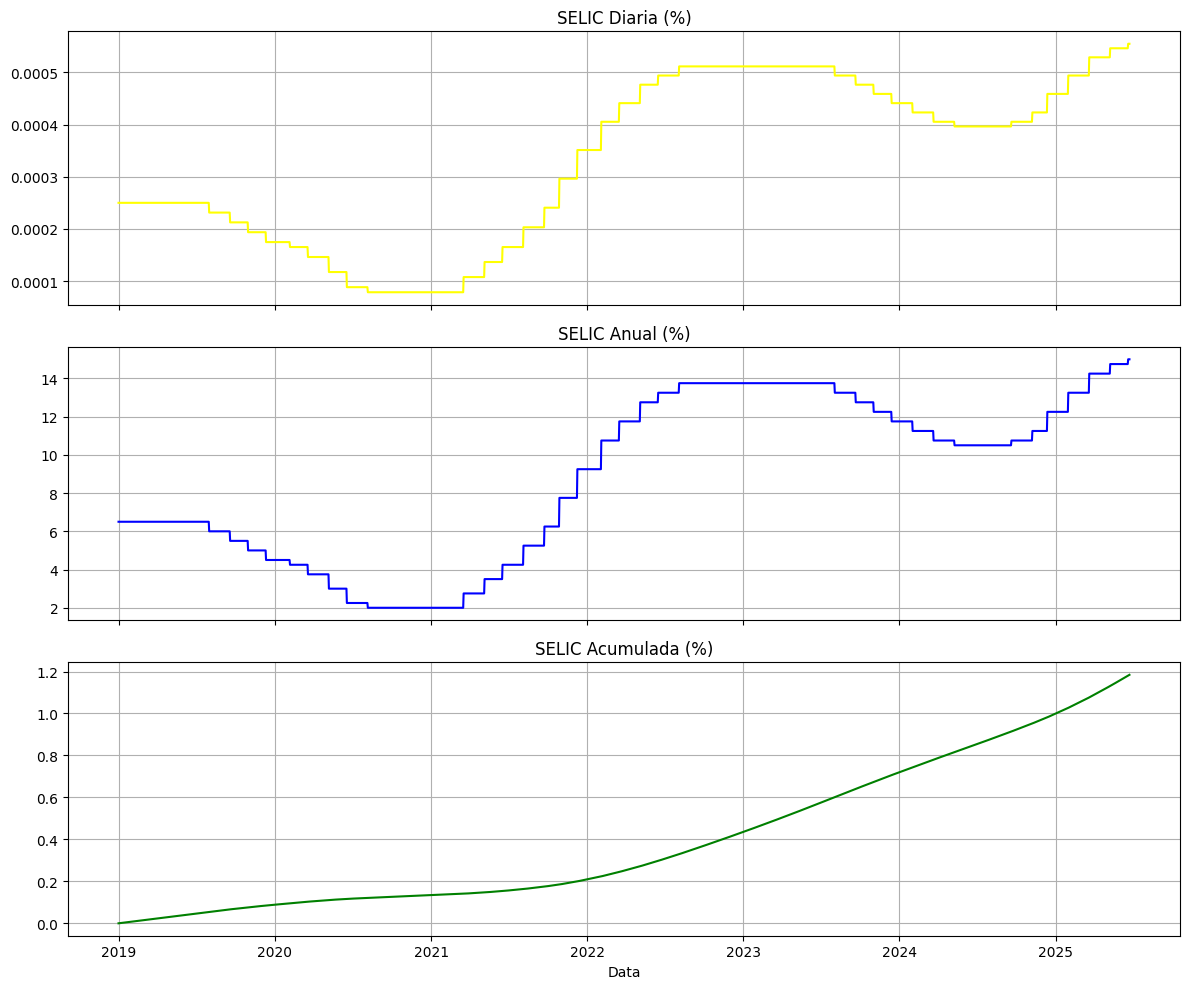

In [63]:
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

axs[0].plot(selic.index, selic['SELIC Diaria (%)'], color= 'yellow')
axs[0].set_title('SELIC Diaria (%)')
axs[0].grid(True)

axs[1].plot(selic.index, selic['SELIC Anual (%)'], color='blue')
axs[1].set_title('SELIC Anual (%)')
axs[1].grid(True)

axs[2].plot(selic.index, selic['SELIC Acumulada (%)'], color='green')
axs[2].set_title('SELIC Acumulada (%)')
axs[2].set_xlabel('Data')
axs[2].grid(True)

plt.tight_layout()
plt.show()

In [65]:
# Encontrando o período com maior e menor SELIC Anual
maior_taxa = selic['SELIC Anual (%)'].idxmax()
menor_taxa = selic['SELIC Anual (%)'].idxmin()
valor_maior = selic.loc[maior_taxa, 'SELIC Anual (%)']
valor_menor = selic.loc[menor_taxa, 'SELIC Anual (%)']

# Apresentando os resultados
print(f"O período com a maior taxa de juros (anual) foi em {maior_taxa.strftime('%d/%m/%Y')}, com taxa de {valor_maior:.2f}% a.a.")
print(f"O período com a menor taxa de juros (anual) foi em {menor_taxa.strftime('%d/%m/%Y')}, com taxa de {valor_menor:.2f}% a.a.")

O período com a maior taxa de juros (anual) foi em 19/06/2025, com taxa de 15.00% a.a.
O período com a menor taxa de juros (anual) foi em 06/08/2020, com taxa de 2.00% a.a.


In [68]:
import numpy as np
import pandas as pd

def simula_investimento_recorrente_rapido(selic, aporte_diario):
    """
    selic: DataFrame com índice datetime e coluna 'SELIC Diaria (%)' em decimal
    aporte_diario: valor fixo aportado todo dia

    Retorna DataFrame com coluna 'Valor Acumulado' simulando o saldo diário.
    """
    selic_diaria = selic['SELIC Diaria (%)'].values
    n = len(selic_diaria)

    # Calcular fator diário (1 + taxa)
    fatores = 1 + selic_diaria

    # Calcular fator acumulado reverso: para cada dia i, qual o produto dos fatores de i até o último dia
    # Isso diz quanto um aporte feito no dia i rende até o último dia.
    fator_acumulado_reverso = np.ones(n)
    fator_acumulado_reverso[-1] = fatores[-1]
    for i in range(n - 2, -1, -1):
        fator_acumulado_reverso[i] = fator_acumulado_reverso[i + 1] * fatores[i]

    # Agora somamos o valor futuro de cada aporte para cada dia.
    # O saldo no dia k é a soma dos aportes dos dias 0 até k, cada um acumulado do dia do aporte até o dia k.
    # Para isso, criamos uma matriz triangular inferior de fatores acumulados

    # Uma forma eficiente: o saldo no dia k é a soma dos aportes multiplicados pelo fator acumulado do aporte até o dia k.
    # Mas calcular isso diretamente pode ser lento, então vamos usar a ideia:
    # saldo[k] = aporte * sum_{i=0}^{k} prod_{j=i}^{k} (1 + taxa_j)

    # Podemos usar a matriz triangular, mas é pesado. Melhor: calcular acumulado progressivo e fazer soma incremental

    # Primeiro, calcular produto acumulado progressivo:
    prod_acum = np.cumprod(fatores)

    # saldo no dia k = aporte * sum_{i=0}^{k} (prod_{j=i}^{k} (1+taxa_j))
    # = aporte * sum_{i=0}^{k} (prod_acum[k] / prod_acum[i-1])  (com prod_acum[-1] = 1 para i=0)

    saldo = np.zeros(n)
    for k in range(n):
        soma = 0
        for i in range(k+1):
            if i == 0:
                fator = prod_acum[k]
            else:
                fator = prod_acum[k] / prod_acum[i-1]
            soma += fator
        saldo[k] = aporte_diario * soma

    resultado = pd.DataFrame(data=saldo, index=selic.index, columns=['Valor Acumulado'])
    return resultado


In [72]:
aporte = 100
resultado = simula_investimento_recorrente_rapido(selic, aporte)
print(resultado.head())

            Valor Acumulado
Date                       
2019-01-01       100.024993
2019-01-02       200.074986
2019-01-03       300.149984
2019-01-04       400.249994
2019-01-05       500.375022
